# Predicting customer churn in telecom industry


In [184]:
# Importing the required libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

# Loading the data

In [185]:
#Creating the dataframe from the data set
pd.set_option('display.max_columns',250)
telecom_df = pd.read_csv("telecom_churn_data.csv")

In [186]:
#head
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Overview of the data

In [187]:
#Shape of the data
telecom_df.shape

(99999, 226)

In [188]:
#Data types of the columns
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Observations:
- 179 float variables
- 35 integer variables
- 12 object variables

In [189]:
#No. of missing values
telecom_df.isnull().sum().values.sum()

3594931

In [190]:
# Calculating the no. of columns that have only 1 unique value
one_uv_df = telecom_df.loc[:,telecom_df.apply(pd.Series.nunique) == 1]
one_uv_df.shape[1]

16

In [191]:
#Calculating columns with missing values > 30%

mv_pct = telecom_df.isnull().sum() * 100 / len(telecom_df)
mv_summary_df = pd.DataFrame({'columns': telecom_df.columns,'mv_pct': mv_pct})
mv_30_cols = mv_summary_df.loc[(mv_summary_df["mv_pct"] > 30.0)]["columns"]
print(mv_30_cols.size)



40


In [192]:
# Listing the columns of object type
print(list(telecom_df.select_dtypes(include=['object']).columns))

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [193]:
#Listing the columns with integer type
print(list(telecom_df.select_dtypes(include=['int64']).columns))

['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon']


In [194]:
cols = ["total_rech_num_6","total_rech_amt_6","max_rech_amt_6","monthly_2g_6","sachet_2g_6","monthly_3g_6","sachet_3g_6"]
telecom_df[cols].describe(percentiles=[.25,.5,.70,.90])

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,327.514615,104.637486,0.079641,0.389384,0.075921,0.074781
std,7.078405,398.019701,120.614894,0.295058,1.497320,0.363371,0.568344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,109.000000,30.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,230.000000,110.000000,0.000000,0.000000,0.000000,0.000000
70%,8.000000,378.000000,110.000000,0.000000,0.000000,0.000000,0.000000
90%,15.000000,732.000000,202.000000,0.000000,1.000000,0.000000,0.000000
max,307.000000,35190.000000,4010.000000,4.000000,42.000000,14.000000,29.000000


#### Observations:
- Following variables are categorical: mobile_number, last_day_rch_amt_*, monthly_2g_*, sachet_2g_*,sachet_3g_*

# Dealing with the date variables

In [195]:
#Converting the date variables to datetime types
date_vars=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

for col_date in date_vars:
    telecom_df[col_date] = pd.to_datetime(telecom_df[col_date])
    
telecom_df['days_last_rech_6']=telecom_df.date_of_last_rech_6.dt.day
telecom_df['days_last_rech_7']=telecom_df.date_of_last_rech_7.dt.day
telecom_df['days_last_rech_8']=telecom_df.date_of_last_rech_8.dt.day
telecom_df['days_last_rech_9']=telecom_df.date_of_last_rech_9.dt.day

In [196]:
#Drop the original columns
telecom_df.drop(date_vars, axis=1, inplace=True)
telecom_df.shape

(99999, 226)

# Filtering the high value customers

Definition: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)



In [197]:
#Identifying the columns with recharge information
telecom_recharge_cols = [col for col in telecom_df.columns if 'rech_' in col]
print(telecom_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'days_last_rech_6', 'days_last_rech_7', 'days_last_rech_8', 'days_last_rech_9']


#### Notes:
- Columns starting with total_rech_amt_* indicates the total amount recharged for non-data usage
- Columns starting with total_rech_data_* indicates the total data recharged for data usage
- Columns starting with av_rech_amt_data_* indicates the average amount recharged for data usage
- Net recharge amount for a given month (for e.g month 6) is given by:

   `net_recharge_amt_6 = total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)`


In [198]:
#Columns required for calculating the net recharge amount for months 6 & 7

recharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']


In [199]:
telecom_df[recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
total_rech_amt_6      99999 non-null int64
total_rech_amt_7      99999 non-null int64
total_rech_amt_8      99999 non-null int64
total_rech_amt_9      99999 non-null int64
total_rech_data_6     25153 non-null float64
total_rech_data_7     25571 non-null float64
total_rech_data_8     26339 non-null float64
total_rech_data_9     25922 non-null float64
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null float64
dtypes: float64(8), int64(4)
memory usage: 9.2 MB


In [200]:
cols = ["total_rech_data_6","av_rech_amt_data_6",
        "total_rech_data_7","av_rech_amt_data_7",
        "total_rech_data_8","av_rech_amt_data_8",
        "total_rech_data_9","av_rech_amt_data_9",
        "total_rech_amt_6",
        "total_rech_amt_7",
        "total_rech_amt_8",
        "total_rech_amt_9"]

telecom_df[cols].describe(percentiles=[.25,.5,.70,.90])

,total_rech_data_6,av_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7,total_rech_data_8,av_rech_amt_data_8,total_rech_data_9,av_rech_amt_data_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
count,25153.000000,25153.000000,25571.000000,25571.000000,26339.000000,26339.000000,25922.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,2.463802,192.600982,2.666419,200.981292,2.651999,197.526489,2.441170,192.734315,327.514615,322.962970,324.157122,303.345673
std,2.789128,192.646318,3.031593,196.791224,3.074987,191.301305,2.516339,188.400286,398.019701,408.114237,416.540455,404.588583
min,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,82.000000,1.000000,92.000000,1.000000,87.000000,1.000000,69.000000,109.000000,100.000000,90.000000,52.000000
50%,1.000000,154.000000,1.000000,154.000000,1.000000,154.000000,2.000000,164.000000,230.000000,220.000000,225.000000,200.000000
70%,2.000000,218.000000,2.000000,237.000000,2.000000,231.000000,2.000000,232.000000,378.000000,370.000000,380.000000,355.000000
90%,5.000000,358.000000,6.000000,396.000000,6.000000,396.000000,5.000000,373.000000,732.000000,731.000000,736.000000,709.000000
max,61.000000,7546.000000,54.000000,4365.000000,60.000000,4076.000000,84.000000,4061.000000,35190.000000,40335.000000,45320.000000,37235.000000


In [201]:
#Calculating the net recharge amount for all the 4 months

telecom_df['total_recharge_data_amt_6'] = telecom_df['total_rech_data_6'].fillna(1) * telecom_df['av_rech_amt_data_6'].fillna(154)

telecom_df['total_recharge_data_amt_7'] = telecom_df['total_rech_data_7'].fillna(1) * telecom_df['av_rech_amt_data_7'].fillna(154)

telecom_df['total_recharge_data_amt_8'] = telecom_df['total_rech_data_8'].fillna(1) * telecom_df['av_rech_amt_data_8'].fillna(154)

telecom_df['total_recharge_data_amt_9'] = telecom_df['total_rech_data_9'].fillna(2) * telecom_df['av_rech_amt_data_9'].fillna(164)



telecom_df['net_recharge_amt_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_recharge_data_amt_6']

telecom_df['net_recharge_amt_7'] = telecom_df['total_rech_amt_7'] + telecom_df['total_recharge_data_amt_7']

telecom_df['net_recharge_amt_8'] = telecom_df['total_rech_amt_8'] + telecom_df['total_recharge_data_amt_8']

telecom_df['net_recharge_amt_9'] = telecom_df['total_rech_amt_9'] + telecom_df['total_recharge_data_amt_9']



#### Notes


In [202]:
#Calculating the average recharge amounts for the 2 months
telecom_df['avg_rech_amt_6_7'] = (telecom_df['net_recharge_amt_6']  + telecom_df['net_recharge_amt_7'])/2



In [203]:
##Calculating the 70th percentile of the average recharge amount in the first 2 months
telecom_df["avg_rech_amt_6_7"].describe(percentiles=[.25,.5,.70,.90])

count    99999.000000
mean       600.270197
std        846.483166
min         23.000000
25%        271.000000
50%        403.000000
70%        582.000000
90%       1093.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

#### Observation
- The 70th percentile of the average recharge amount in the good phase(first 2 months) is 582

In [204]:
#Filtering the high-value customers based on whether they recharged for an amount greater than 582
telecom_hv_df = telecom_df[telecom_df['avg_rech_amt_6_7'] >= 582]

In [205]:
telecom_hv_df.shape

(30050, 235)

#### Observation
- There are approximately 29.9 K high value customers

# Handling missing values

In [206]:
# Dropping the columns that have only 1 unique value
telecom_hv_df = telecom_hv_df.loc[:,telecom_hv_df.apply(pd.Series.nunique) != 1]
telecom_hv_df.shape

(30050, 219)

In [207]:
#Dropping the columns with missing values > 30%
mv_pct = telecom_hv_df.isnull().sum() * 100 / len(telecom_hv_df)
mv_summary_df = pd.DataFrame({'columns': telecom_hv_df.columns,'mv_pct': mv_pct})
mv_30_cols = mv_summary_df.loc[(mv_summary_df["mv_pct"] > 30.0)]["columns"]
telecom_hv_df.drop(mv_30_cols, axis=1, inplace=True)
telecom_hv_df.shape

(30050, 179)

In [208]:
#Dropping the redundant recharge columns
recharge_cols_drop = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

telecom_hv_df.drop(recharge_cols_drop, axis=1, inplace=True,errors="ignore")
telecom_hv_df.shape

(30050, 179)

# Tagging the churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [209]:
#Checking if any of the above attributes have null values

#  total_ic_mou_9
NullValuesPct = round(100*(telecom_hv_df["total_ic_mou_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in total_ic_mou_9 : ",NullValuesPct)

#  total_og_mou_9
NullValuesPct = round(100*(telecom_hv_df["total_og_mou_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in total_og_mou_9: ",NullValuesPct)

#  vol_2g_mb_9
NullValuesPct = round(100*(telecom_hv_df["vol_2g_mb_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in vol_2g_mb_9 : ",NullValuesPct)

#  vol_3g_mb_9
NullValuesPct = round(100*(telecom_hv_df["vol_3g_mb_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in vol_3g_mb_9: ",NullValuesPct)

% of null values in total_ic_mou_9 :  0.0
% of null values in total_og_mou_9:  0.0
% of null values in vol_2g_mb_9 :  0.0
% of null values in vol_3g_mb_9:  0.0


In [210]:
# Tagging the churned customers based on the 4th month
telecom_hv_df['churn'] = np.where(telecom_hv_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [212]:
#Calculating the total churn %
ChurnPct = round(100*(telecom_hv_df["churn"].sum()/len(telecom_hv_df.index)), 2)
print("% of high-value churn customers: ",ChurnPct)

% of high-value churn customers:  8.44


#### Observations:
- The low percentage of high-value churn customers indicates a class imbalance that needs to be handled

In [213]:
#Dropping columns corresponding to the churn phase (month 9) 

churn_phase_cols = [col for col in telecom_hv_df.columns if '_9' in col]
print(churn_phase_cols)

telecom_hv_df.drop(churn_phase_cols, axis=1, inplace=True)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'days_last_rech_9', 'total_recharge_data_amt_9', 'net_recharge_amt_9']


In [214]:
telecom_hv_df.shape

(30050, 137)

# Missing value treatment

In [215]:
#Checking for columns that have any missing values
amy_mv_pct = telecom_hv_df.isnull().sum() * 100 / len(telecom_hv_df)
any_mv_df = pd.DataFrame({'columns': telecom_hv_df.columns,'any_mv_pct': amy_mv_pct})
any_mv_columns = any_mv_df.loc[(any_mv_df["any_mv_pct"] > 0.0)]
any_mv_columns = any_mv_columns.sort_values(by="any_mv_pct",ascending=False)
any_mv_columns

,columns,any_mv_pct
std_ic_mou_8,std_ic_mou_8,3.703827
loc_og_t2f_mou_8,loc_og_t2f_mou_8,3.703827
loc_og_t2c_mou_8,loc_og_t2c_mou_8,3.703827
loc_og_mou_8,loc_og_mou_8,3.703827
std_og_t2t_mou_8,std_og_t2t_mou_8,3.703827
std_og_t2m_mou_8,std_og_t2m_mou_8,3.703827
std_og_t2f_mou_8,std_og_t2f_mou_8,3.703827
std_og_mou_8,std_og_mou_8,3.703827
std_ic_t2f_mou_8,std_ic_t2f_mou_8,3.703827
isd_og_mou_8,isd_og_mou_8,3.703827


In [216]:
telecom_hv_df.fillna(0,inplace=True)

In [217]:
amy_mv_pct = telecom_hv_df.isnull().sum() * 100 / len(telecom_hv_df)
any_mv_df = pd.DataFrame({'columns': telecom_hv_df.columns,'any_mv_pct': amy_mv_pct})
any_mv_columns = any_mv_df.loc[(any_mv_df["any_mv_pct"] > 0.0)]
any_mv_columns = any_mv_columns.sort_values(by="any_mv_pct")
any_mv_columns

,columns,any_mv_pct


# Renaming column variables

In [218]:

telecom_hv_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                              'jul_vbc_3g': 'vbc_3g_7', 
                              'aug_vbc_3g': 'vbc_3g_8', 
                              'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [219]:
telecom_hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30050 entries, 7 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(26)
memory usage: 31.5 MB


# 2.6 Identifying highly correlated variables

In [220]:
#Find Highly correlated data and drop Highly Correlated Columns
pd.set_option('display.max_rows', 500)
cor = telecom_hv_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

std_ic_t2m_mou_8    std_ic_t2m_mou_6             0.600139
roam_og_mou_8       roam_og_mou_7                0.600412
sachet_2g_8         sachet_2g_6                  0.600473
arpu_8              arpu_6                       0.601297
loc_og_mou_6        loc_og_t2t_mou_7             0.601541
std_og_t2t_mou_8    std_og_t2t_mou_6             0.602110
std_og_mou_7        std_og_t2t_mou_8             0.603504
total_ic_mou_8      loc_ic_t2t_mou_8             0.603602
total_og_mou_6      std_og_t2t_mou_6             0.605507
std_og_mou_7        offnet_mou_7                 0.607408
roam_ic_mou_8       roam_ic_mou_7                0.608517
total_ic_mou_6      loc_ic_t2t_mou_6             0.608816
total_ic_mou_7      loc_ic_t2m_mou_6             0.609177
total_rech_amt_7    total_rech_amt_6             0.609707
vbc_3g_8            vol_3g_mb_8                  0.610002
onnet_mou_8         onnet_mou_6                  0.611426
total_og_mou_7      std_og_t2t_mou_7             0.612174
monthly_3g_7  

In [221]:
telecom_hv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30050 entries, 7 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(26)
memory usage: 31.5 MB


# Dropping columns that will not be useful

In [222]:
#Dropping the mobile_number column
telecom_hv_df.drop(["mobile_number"], axis=1, inplace=True,errors="ignore")

In [139]:
#Dropping the columns that are highly co-related

cols_to_drop = ["arpu_6","arpu_7",
                "total_recharge_data_amt_6","total_recharge_data_amt_7","net_recharge_amt_6","net_recharge_amt_7",
                "isd_og_mou_7","isd_og_mou_6",
                "loc_ic_t2m_mou_8","loc_ic_t2t_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_6",
                "loc_ic_t2t_mou_6","loc_ic_t2m_mou_8","loc_ic_t2t_mou_7","loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_mou_6",
                "loc_ic_t2m_mou_6","loc_ic_t2t_mou_8","loc_ic_t2m_mou_7","loc_ic_mou_6","loc_ic_mou_7","loc_ic_t2m_mou_8",
                "loc_ic_t2f_mou_6","loc_ic_t2f_mou_7",
                "loc_ic_t2m_mou_6","loc_ic_t2m_mou_7",
                "loc_ic_t2t_mou_6","loc_ic_t2t_mou_7",
                "loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_t2t_mou_6","loc_og_t2m_mou_6",
                "loc_og_t2t_mou_8","loc_og_t2t_mou_6","loc_og_t2m_mou_8","loc_og_t2m_mou_6","loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_mou_6",
                "loc_og_t2m_mou_6","loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_mou_6","loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_og_mou_7",
                "loc_og_t2f_mou_6","loc_og_t2f_mou_7",
                "loc_og_t2m_mou_6","loc_og_t2m_mou_7",
                "loc_og_t2t_mou_6","loc_og_t2t_mou_7",
                "max_rech_amt_7","max_rech_amt_6",
                "monthly_3g_6","vol_3g_mb_7",
                "vol_3g_mb_8","monthly_3g_7",
                "offnet_mou_6","offnet_mou_7",
                "onnet_mou_6","onnet_mou_7",
                "sachet_2g_6","sachet_2g_7",
                "std_ic_t2m_mou_7","std_ic_t2t_mou_6","std_ic_t2m_mou_6",
                "std_ic_t2m_mou_8","std_ic_t2t_mou_7","std_ic_mou_6","std_ic_t2m_mou_7",
                "std_ic_t2m_mou_7","std_ic_mou_6","std_ic_t2t_mou_8","std_ic_mou_7","std_ic_t2m_mou_8",
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7",
                "std_ic_t2m_mou_6","std_ic_t2m_mou_7",
                "std_og_t2m_mou_6","std_og_t2t_mou_6",
                "std_og_t2t_mou_8","offnet_mou_7","onnet_mou_7","std_og_t2t_mou_7","std_og_t2m_mou_7","std_og_mou_6",
                "offnet_mou_8","std_og_t2m_mou_7","std_og_t2t_mou_7","onnet_mou_8","std_og_mou_6","std_og_t2t_mou_8","std_og_t2m_mou_8","std_og_mou_7",
                "std_og_t2f_mou_6","std_og_t2f_mou_7",
                "offnet_mou_7","offnet_mou_6",
                "offnet_mou_8","std_og_t2m_mou_6","offnet_mou_7",
                "std_og_t2m_mou_6","offnet_mou_7","std_og_t2m_mou_7","offnet_mou_8",
                "onnet_mou_7","onnet_mou_6",
                "onnet_mou_6","onnet_mou_8","std_og_t2t_mou_6","onnet_mou_7",
                "std_og_t2t_mou_6","onnet_mou_7","std_og_t2t_mou_7","onnet_mou_8",
                "loc_ic_t2t_mou_6","loc_ic_t2m_mou_7","loc_ic_mou_8","loc_ic_mou_7","loc_ic_t2m_mou_6","loc_ic_mou_6",
                "loc_ic_t2t_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_mou_6","loc_ic_mou_8","total_ic_mou_6","loc_ic_mou_7",
                "loc_ic_t2m_mou_7","loc_ic_mou_6","total_ic_mou_6","loc_ic_mou_7","loc_ic_t2m_mou_8","total_ic_mou_7","loc_ic_mou_8",
                "std_og_t2t_mou_6","std_og_t2m_mou_6","onnet_mou_6","offnet_mou_6","std_og_mou_6",
                "std_og_t2t_mou_7","std_og_mou_8","std_og_t2m_mou_7","std_og_mou_6","onnet_mou_7","offnet_mou_7","total_og_mou_6","std_og_mou_7",
                "total_og_mou_6","std_og_t2t_mou_8","std_og_t2m_mou_8","std_og_mou_7","onnet_mou_8","offnet_mou_8","total_og_mou_7","std_og_mou_8",
                "arpu_8","arpu_7","arpu_6"
                
               ]

telecom_hv_df.drop(cols_to_drop, axis=1, inplace=True,errors="ignore")

In [223]:
telecom_hv_df.shape

(30050, 136)

# Common Functions

In [224]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [266]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return fpr, tpr, thresholds

In [268]:
def computeModelMetrics(y_test, y_pred, model, flag = 0):

    print(confusion_matrix(y_test,y_pred))
    print("Accuracy Score ==> {}".format(accuracy_score(y_test,y_pred)))
    print("AUC Score ==> {}".format(roc_auc_score(y_test,y_pred)))
    
    if flag == 1: #For PCA
        pred_probs_test = model.predict_proba(df_test_pca)[:,1]
    elif flag == 2: #For XGBoost For Imbalance Data
        pred_probs_test = model.predict_proba(np.array(X_test))[:,1]
    elif flag == 3: #For Lasso
        pred_probs_test = lasso.predict(X_test)
    else:
        pred_probs_test = model.predict_proba(X_test)[:,1]
    print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
    
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(TP/(TP+FP)))
    print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(TN/(TN+FN)))
    plot_roc(y_test, y_pred)

In [227]:
def randomforestHyperparameterTuning(parameters, X_train, y_train, n_folds = 5, n_jobs = 4):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier

    # instantiate the model
    param = list(parameters.keys())[0]
    if((param == 'max_features') | (param == 'n_estimators')):
        rfc = RandomForestClassifier(max_depth=4)
    else:
        rfc = RandomForestClassifier()
    # fit tree on training data
    rfc = GridSearchCV(rfc, parameters, 
                        cv=n_folds, 
                       scoring="accuracy",
                      return_train_score=True, 
                       verbose=10,
                      n_jobs = n_jobs)
    rfc.fit(X_train, y_train)
    #print("Best Parameter ==> {}".format(rfc.best_params_))
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',rfc.best_score_,'using Best Parameter',rfc.best_params_)
    
    if(len(list(parameters.keys())) == 1):
        scores = rfc.cv_results_
        scoreParam = "param_" + list(parameters.keys())[0]

        plt.figure()
        plt.plot(scores[scoreParam], 
                 scores["mean_train_score"], 
                 label="training accuracy")
        plt.plot(scores[scoreParam], 
                 scores["mean_test_score"], 
                 label="test accuracy")
        plt.xlabel(param)
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

In [228]:
def convertCategorical(contVal, threshold):
    if(contVal > threshold):
        return 1
    else:
        return 0
convertCategorical = np.vectorize(convertCategorical)

# Modelling

In [229]:
telecom_hv_df.shape

(30050, 136)

In [230]:
#Splitting the data frame into X & y

X = telecom_hv_df.drop(['churn'], axis=1)
y = telecom_hv_df['churn']

telecom_hv_df.drop('churn', axis=1, inplace=True, errors="ignore")

In [231]:
# Standardizing the predictor variables
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [232]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X)

#Using a Train : Test Split of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# Basic Logistic Regression - Baseline model

In [269]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(verbose=10,class_weight="balanced")
lr1.fit(X_train, y_train)
y_pred_1 = lr1.predict(X_test)

[LibLinear]

[[6888 1373]
 [ 131  623]]
Accuracy Score ==> 0.8331669439822518
AUC Score ==> 0.8300286540219503
ROC_AUC Score ==> 0.89
Not-Churn Accuracy Rate:(Specificity) ==> 0.8337973610942985
Churn Accuracy Rate:(Sensitivity) ==> 0.8262599469496021


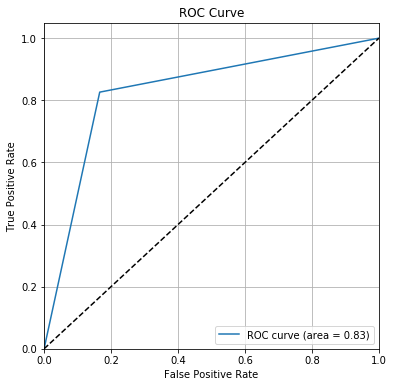

In [270]:
computeModelMetrics(y_test, y_pred_1, lr1)

# Handling Class imbalance

In [235]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()

print("Imbalance in Train Data : ", y_train_imbalance)
print("Imbalance in Test Data : ", y_test_imbalance)

X_train Shape :  (21035, 135)
X_test Shape :  (9015, 135)
Imbalance in Train Data :  0.09250025968629895
Imbalance in Test Data :  0.09127224306984627


In [236]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_train_bal,y_train_bal = sm.fit_sample(X_train,y_train)

In [237]:
print("X_tr_balance Shape", X_train_bal.shape)
print("y_tr_balance Shape", y_train_bal.shape)

imb = (y_train_bal != 0).sum()/(y_train_bal == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr_balance Shape (38508, 135)
y_tr_balance Shape (38508,)
Imbalance in Train Data :  1.0


# Logistic Regression + Balanced class (SMOTE)

In [238]:
lr2 = LogisticRegression(verbose=10)
lr2.fit(X_train_bal, y_train_bal)
y_pred_2 = lr2.predict(X_test)

[LibLinear]

[[6911 1350]
 [ 137  617]]
Accuracy Score ==> 0.8350526899611758
AUC Score ==> 0.8274419574639971
ROC_AUC Score ==> 0.89
Not-Churn Accuracy Rate:(Specificity) ==> 0.8365815276600895
Churn Accuracy Rate:(Sensitivity) ==> 0.8183023872679045


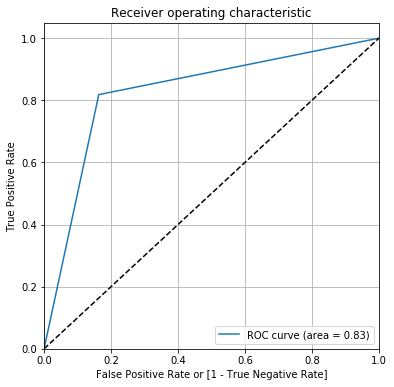

In [239]:
computeModelMetrics(y_test, y_pred_2, lr2)

# Using Random Forest with default parameters

In [240]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[8148  113]
 [ 420  334]]
Accuracy Score ==> 0.9408763172490294
AUC Score ==> 0.7146460454463577
ROC_AUC Score ==> 0.89
Not-Churn Accuracy Rate:(Specificity) ==> 0.9863212686115482
Churn Accuracy Rate:(Sensitivity) ==> 0.44297082228116713


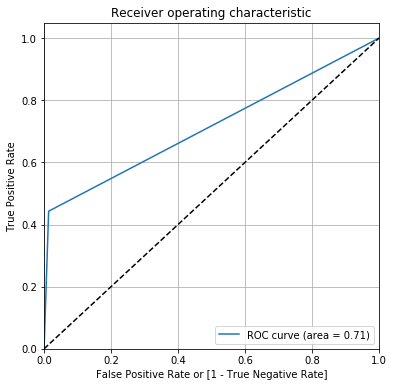

In [241]:
y_pred_rfc = rfc.predict(X_test)
computeModelMetrics(y_test, y_pred_rfc, rfc)

# Using Random Forest with SMOTE

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_train_bal, y_train_bal)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[7963  298]
 [ 289  465]]
Accuracy Score ==> 0.9348863006100943
AUC Score ==> 0.7903188803482664
ROC_AUC Score ==> 0.91
Not-Churn Accuracy Rate:(Specificity) ==> 0.963926885364968
Churn Accuracy Rate:(Sensitivity) ==> 0.616710875331565


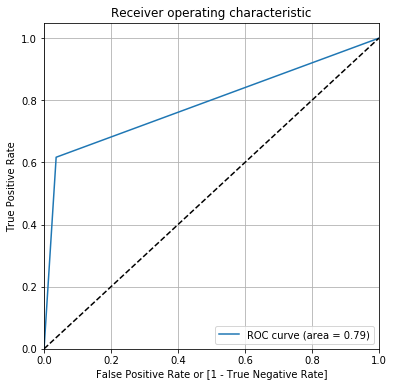

In [243]:
y_pred_rfc_smote = rfc_smote.predict(X_test)
computeModelMetrics(y_test, y_pred_rfc_smote, rfc_smote)

# Lasso Regression with GridSearch

In [244]:
from sklearn.linear_model import Lasso
# hide warnings
import warnings
warnings.filterwarnings('ignore')

params = {'alpha': [0.0001, 0.001, 0.01, 0.1,1.0,10.0,100]}
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = 5, 
                              return_train_score=True,
                              verbose = 10,
                              n_jobs = -1)            

lasso_model_cv.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:  2.3min remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=10)

In [245]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.741794,0.278741,0.005642,0.004667,0.0001,{'alpha': 0.0001},-0.363425,-0.355491,-0.314560,-0.362085,-0.359718,-0.351055,0.018446,1,-0.286773,-0.288468,-0.298516,-0.296509,-0.297830,-0.293619,0.004969
1,26.243086,0.720938,0.007255,0.003743,0.001,{'alpha': 0.001},-0.364053,-0.355727,-0.315071,-0.363883,-0.361528,-0.352052,0.018735,2,-0.287783,-0.289580,-0.299475,-0.296919,-0.298276,-0.294407,0.004778
2,25.302626,0.343922,0.005656,0.004674,0.01,{'alpha': 0.01},-0.371534,-0.362581,-0.321007,-0.372711,-0.370480,-0.359662,0.019652,3,-0.294730,-0.297185,-0.306148,-0.301420,-0.302799,-0.300456,0.004057
3,22.532860,0.629788,0.006278,0.003653,0.1,{'alpha': 0.1},-0.383564,-0.374971,-0.329656,-0.383750,-0.382182,-0.370824,0.020835,4,-0.302553,-0.304899,-0.314275,-0.310288,-0.311402,-0.308683,0.004316
4,2.388865,0.297936,0.003809,0.003231,1,{'alpha': 1.0},-0.413064,-0.405939,-0.356332,-0.421221,-0.418587,-0.403028,0.023928,5,-0.321012,-0.323727,-0.338946,-0.341385,-0.342552,-0.333524,0.009222


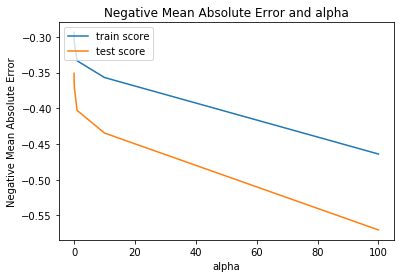

In [246]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [247]:
print("Best Alpha Value ==> {} ".format(lasso_model_cv.best_params_))

Best Alpha Value ==> {'alpha': 0.0001} 


In [248]:
alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_bal, y_train_bal)


y_pred = lasso.predict(X_test)
y_pred = convertCategorical(y_pred, 0.5)

[[6950 1311]
 [ 137  617]]
Accuracy Score ==> 0.8393788130892956
AUC Score ==> 0.8298024465089069
ROC_AUC Score ==> 0.89
Not-Churn Accuracy Rate:(Specificity) ==> 0.8413025057499092
Churn Accuracy Rate:(Sensitivity) ==> 0.8183023872679045


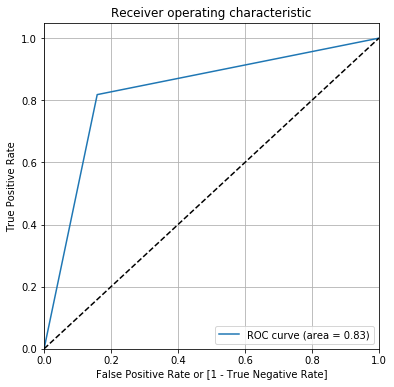

In [249]:
computeModelMetrics(y_test, y_pred, lasso, 3)

In [250]:
lasso.coef_

array([-2.46404531e-05,  6.77138202e-05, -4.40345688e-05, -3.58045143e-05,
        1.13493433e-04, -8.02828004e-05,  1.31612571e-04, -2.22747753e-05,
       -2.79691766e-04,  1.02104670e-04,  8.51772025e-05,  2.01279188e-05,
       -1.07589861e-04,  2.49566707e-04,  3.69967207e-04,  3.49357657e-05,
       -5.96494978e-05, -1.09379880e-04, -2.01239997e-04,  3.57094743e-05,
        6.77038999e-05, -7.54251506e-04, -8.53786803e-05,  2.70204040e-04,
       -1.33205184e-03,  2.19081215e-04,  3.07791134e-04,  2.31542551e-05,
       -1.94009083e-07, -6.34288736e-06,  9.24823096e-05, -6.22569358e-05,
       -8.18888267e-05, -7.76921730e-05,  9.34846988e-05,  1.19033125e-04,
        2.42479564e-04, -6.56136683e-05, -7.59569572e-04, -1.57441183e-05,
       -4.04161439e-06,  6.07599146e-07, -1.70675687e-05, -3.18755283e-04,
        3.03831298e-04,  1.06860946e-04,  3.80411587e-04, -8.08254082e-04,
       -1.31260462e-03,  6.05422530e-03, -2.17308041e-03,  3.08719371e-06,
       -2.54649577e-06,  

In [251]:
#Creating a data frame with the co-efficients estimated by lasso regression along with their corresponding features
lasso_features = pd.DataFrame({"Feature":telecom_hv_df.columns,"Coefficients":np.transpose(lasso.coef_)})
lasso_features = lasso_features.loc[lasso_features['Coefficients'] != 0]
lasso_features.sort_values(by=['Coefficients'],ascending=False)

,Feature,Coefficients
118,sachet_3g_7,1.088073e-02
49,og_others_7,6.054225e-03
117,sachet_3g_6,5.984768e-03
90,total_rech_num_6,2.212959e-03
91,total_rech_num_7,1.540741e-03
112,sachet_2g_7,1.188621e-03
73,std_ic_t2f_mou_7,4.065883e-04
46,spl_og_mou_7,3.804116e-04
14,roam_og_mou_8,3.699672e-04
26,loc_og_t2c_mou_8,3.077911e-04


# Random Forest with grid search and hyperparameter tuning

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed:   26.3s remaining:    2.8s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   29.8s finished


We can get accuracy of 0.9542173054949621 using Best Parameter {'max_depth': 22}


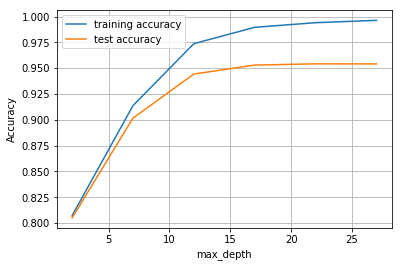

In [252]:
#max_depth
parameters = {'max_depth': range(2,30, 5)}
randomforestHyperparameterTuning(parameters, X_train_bal, y_train_bal)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:  6.1min remaining:  1.5min
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  7.9min finished


We can get accuracy of 0.8722083722862781 using Best Parameter {'n_estimators': 900}


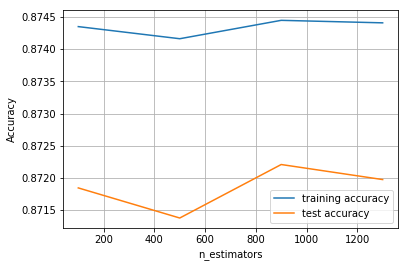

In [253]:
# Number of Trees
parameters = {'n_estimators': range(100, 1500, 400)}
randomforestHyperparameterTuning(parameters, X_train_bal, y_train_bal)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:   32.0s remaining:    1.4s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   36.0s finished


We can get accuracy of 0.8837644125895918 using Best Parameter {'max_features': 75}


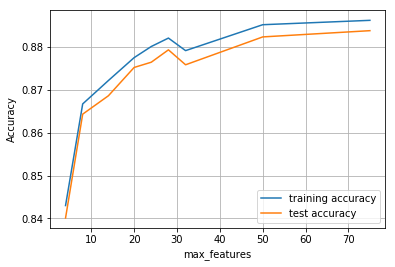

In [255]:
# Maximum Features to split in a node
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32,50,75]}

randomforestHyperparameterTuning(parameters, X_train_bal, y_train_bal)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:   26.0s remaining:    1.1s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   27.3s finished


We can get accuracy of 0.9090838267373014 using Best Parameter {'min_samples_leaf': 50}


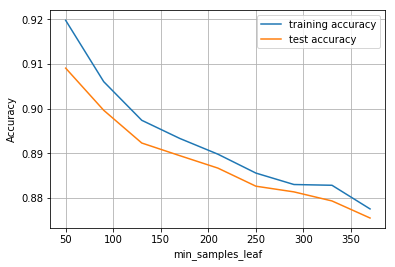

In [256]:
#min_samples_leaf
parameters = {'min_samples_leaf': range(50, 400, 40)}

randomforestHyperparameterTuning(parameters, X_train_bal, y_train_bal)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed:   25.0s remaining:    2.7s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   27.4s finished


We can get accuracy of 0.9112392230185935 using Best Parameter {'min_samples_split': 200}


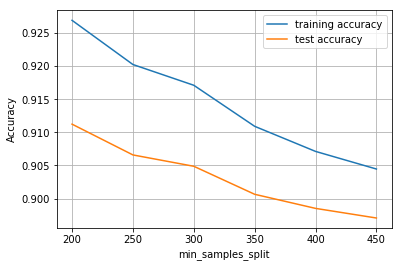

In [257]:
#min_samples_split
parameters = {'min_samples_split': range(200, 500, 50)}

randomforestHyperparameterTuning(parameters, X_train_bal, y_train_bal)

In [259]:
#Random Forest model with all the optimal parameters

from sklearn.ensemble import RandomForestClassifier
opt_rfc = RandomForestClassifier(bootstrap=True,
                                 max_depth=20,
                                 min_samples_leaf=50, 
                                 min_samples_split=200,
                                 max_features=50,
                                 n_estimators=900,
                                 verbose=10)
# fit
opt_rfc.fit(X_train_bal,y_train_bal)

# Making predictions
y_pred_opt_rfc = opt_rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 900


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 900


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


building tree 3 of 900


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


building tree 4 of 900


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


building tree 5 of 900


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


building tree 6 of 900


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s remaining:    0.0s


building tree 7 of 900


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.4s remaining:    0.0s


building tree 8 of 900


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.5s remaining:    0.0s


building tree 9 of 900


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.9s remaining:    0.0s


building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
building tree 43 of 900
building tree 44 of 900
building tree 45 of 900
building tree 46 of 900
building tree 47 of 900
building tree 48 of 900
building tree 49 of 900
building tree 50 of 900
building tree 51

building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900


building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900
building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 13.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.0s finished


[[7577  684]
 [ 168  586]]
Accuracy Score ==> 0.9054908485856905
AUC Score ==> 0.8471948181301228


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


ROC_AUC Score ==> 0.93
Not-Churn Accuracy Rate:(Specificity) ==> 0.9172013073477787
Churn Accuracy Rate:(Sensitivity) ==> 0.7771883289124668


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.2s finished


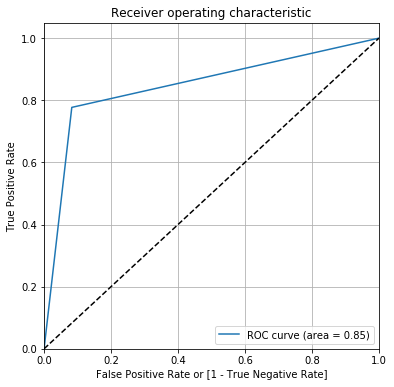

In [262]:
computeModelMetrics(y_test, y_pred_opt_rfc,opt_rfc)

In [263]:
feature_importances = pd.DataFrame(opt_rfc.feature_importances_,
                                   index = telecom_hv_df.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [264]:
feature_importances

,importance
loc_ic_mou_8,0.170918
total_ic_mou_8,0.135966
days_last_rech_8,0.099435
roam_og_mou_8,0.098186
loc_ic_t2m_mou_8,0.074238
net_recharge_amt_8,0.073535
roam_ic_mou_8,0.065949
last_day_rch_amt_8,0.039269
total_rech_amt_8,0.033375
arpu_8,0.019057


In [265]:
feature_importances.size

135